In [2]:
pip install pandas scikit-learn nltk textblob


In [3]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import pandas as pd

# Adjust this path if needed
#file_path = "/content/blogs.csv"

# Remove error_bad_lines=False, keep on_bad_lines='warn' to print warnings
data = pd.read_csv("/content/blogs.csv")
# quoting=3 (csv.QUOTE_MINIMAL): Quotes only fields containing special characters

In [6]:
print("Dataset Info:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
Dataset Info:
 None


In [7]:
print("\nSample Data:\n", data.head())


Sample Data:
                                                 Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [8]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespaces
    return text

data['Processed_Text'] = data['Data'].apply(preprocess_text)


In [9]:
stop_words = set(stopwords.words('english'))
data['Processed_Text'] = data['Processed_Text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)


In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['Processed_Text']).toarray()
y = data['Labels']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Before splitting the data, handle NaN values in 'Labels' column
import numpy as np
data['Labels'] = data['Labels'].fillna("unknown")  # Example: Fill with 'unknown'
# If it is a numerical column
# data['Labels'] = data['Labels'].fillna(np.mean(data['Labels']))


# Now proceed with creating features and splitting the data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['Processed_Text']).toarray()
y = data['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now proceed with model training
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [13]:
y_pred = nb_classifier.predict(X_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt', 'comp.windows.x',
       'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'rec.autos',
       'comp.graphics', 'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'soc.religion.christian',
       'comp.os.ms-windows.misc', 'rec.sport.baseball',
       'soc.religion.christian', 

In [14]:
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Performance:
Accuracy: 0.825

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.90      0.82      0.86        22
comp.sys.ibm.pc.hardware       0.77      0.80      0.78        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.65      0.69      0.67        16
              

In [15]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

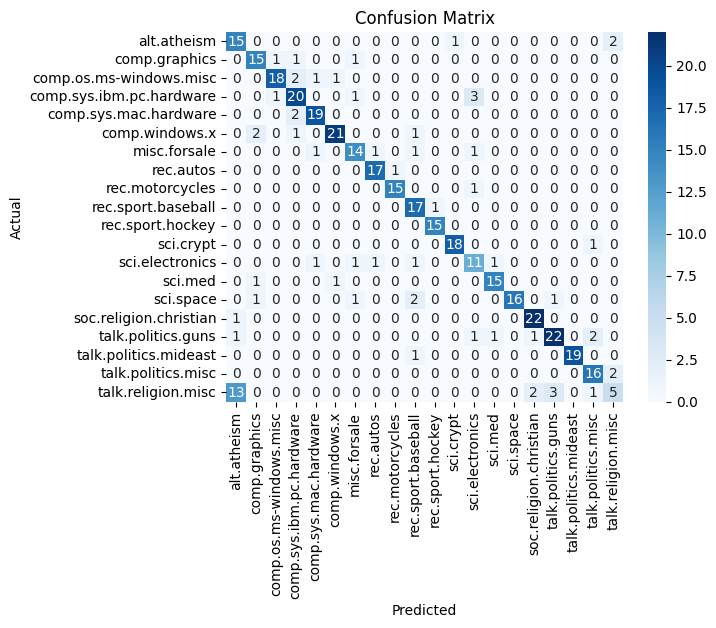

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

data['Sentiment'] = data['Data'].apply(analyze_sentiment)

In [18]:
sentiment_distribution = data['Sentiment'].value_counts(normalize=True)
print("\nSentiment Distribution:\n", sentiment_distribution)



Sentiment Distribution:
 Sentiment
Positive    0.7715
Negative    0.2285
Name: proportion, dtype: float64


In [19]:
sentiment_by_category = data.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print("\nSentiment Distribution by Category:\n", sentiment_by_category)


Sentiment Distribution by Category:
 Sentiment                 Negative  Positive
Labels                                      
alt.atheism                   0.23      0.77
comp.graphics                 0.24      0.76
comp.os.ms-windows.misc       0.22      0.78
comp.sys.ibm.pc.hardware      0.20      0.80
comp.sys.mac.hardware         0.24      0.76
comp.windows.x                0.27      0.73
misc.forsale                  0.16      0.84
rec.autos                     0.17      0.83
rec.motorcycles               0.26      0.74
rec.sport.baseball            0.29      0.71
rec.sport.hockey              0.34      0.66
sci.crypt                     0.19      0.81
sci.electronics               0.19      0.81
sci.med                       0.29      0.71
sci.space                     0.27      0.73
soc.religion.christian        0.13      0.87
talk.politics.guns            0.30      0.70
talk.politics.mideast         0.22      0.78
talk.politics.misc            0.22      0.78
talk.religion.mis

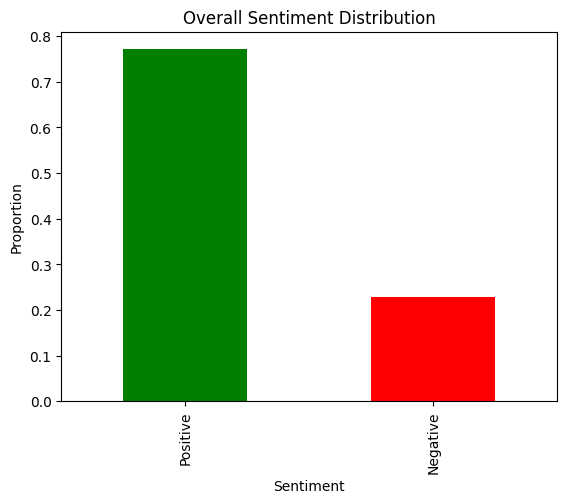

In [20]:
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()

In [21]:
data.to_csv("processed_blogs_with_sentiments.csv", index=False)